In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

: 

In [3]:
gold_df = pd.read_csv("F:\\Machine learning prediction\\gld_price_data.csv")
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
pd.set_option('display.float_format',lambda x : "%.2f"%x)

In [5]:
gold_df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.16,84.86,78.47,15.18,1.47
1,1/3/2008,1447.16,85.57,78.37,15.29,1.47
2,1/4/2008,1411.63,85.13,77.31,15.17,1.48
3,1/7/2008,1416.18,84.77,75.50,15.05,1.47
4,1/8/2008,1390.19,86.78,76.06,15.59,1.56
...,...,...,...,...,...,...
2285,5/8/2018,2671.92,124.59,14.06,15.51,1.19
2286,5/9/2018,2697.79,124.33,14.37,15.53,1.18
2287,5/10/2018,2723.07,125.18,14.41,15.74,1.19
2288,5/14/2018,2730.13,124.49,14.38,15.56,1.19


## Basic information

In [6]:
gold_df.shape

(2290, 6)

In [7]:
#getting the summary statistics of each column of the data
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.00,2290.00,2290.00,2290.00,2290.00
mean,1654.32,122.73,31.84,20.08,1.28
std,519.11,23.28,19.52,7.09,0.13
min,676.53,70.00,7.96,8.85,1.04
25%,1239.87,109.73,14.38,15.57,1.17
50%,1551.43,120.58,33.87,17.27,1.30
75%,2073.01,132.84,37.83,22.88,1.37
max,2872.87,184.59,117.48,47.26,1.60


In [8]:
#getting the basic information of the data
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.92,124.59,14.06,15.51,1.19
2286,5/9/2018,2697.79,124.33,14.37,15.53,1.18
2287,5/10/2018,2723.07,125.18,14.41,15.74,1.19
2288,5/14/2018,2730.13,124.49,14.38,15.56,1.19
2289,5/16/2018,2725.78,122.54,14.41,15.45,1.18


In [10]:
gold_df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

# Data cleaning

change data format

In [11]:
#change the date type to data column
gold_df['Date']=pd.to_datetime(gold_df['Date'],format = '%m/%d/%Y',errors = 'coerce')

In [12]:
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.16,84.86,78.47,15.18,1.47
1,2008-01-03,1447.16,85.57,78.37,15.29,1.47
2,2008-01-04,1411.63,85.13,77.31,15.17,1.48
3,2008-01-07,1416.18,84.77,75.50,15.05,1.47
4,2008-01-08,1390.19,86.78,76.06,15.59,1.56


In [13]:
#chencking the number of the missing values
gold_df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Correlation
1.positive correlation
2.Negative correlation

In [14]:
correlation = gold_df.corr(numeric_only = True)
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.00,0.05,-0.59,-0.27,-0.67
GLD,0.05,1.00,-0.19,0.87,-0.02
USO,-0.59,-0.19,1.00,0.17,0.83
SLV,-0.27,0.87,0.17,1.00,0.32
EUR/USD,-0.67,-0.02,0.83,0.32,1.00


<Axes: >

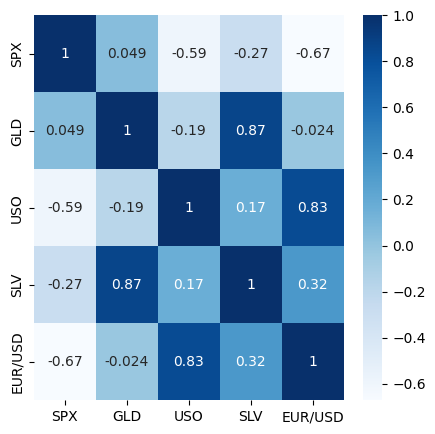

In [15]:
#plot the heatmap for the correlation
plt.figure(figsize = (5,5))
sns.heatmap(correlation,annot = True,cmap = 'Blues')

In [16]:
#correlation values  of the GLD
correlation['GLD']

SPX        0.05
GLD        1.00
USO       -0.19
SLV        0.87
EUR/USD   -0.02
Name: GLD, dtype: float64

Text(5.069444444444445, 0.5, 'Density')

<Figure size 600x600 with 0 Axes>

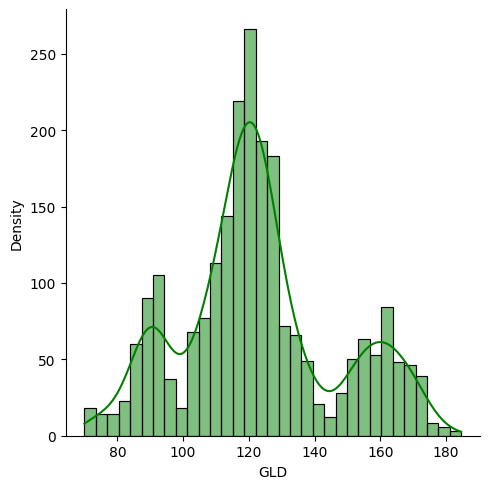

In [17]:
#chencking the distribution of the gold price
plt.figure(figsize = (6,6))
sns.displot(gold_df['GLD'],kde = True,color= 'green')
plt.ylabel("Density")

<Axes: xlabel='GLD', ylabel='Density'>

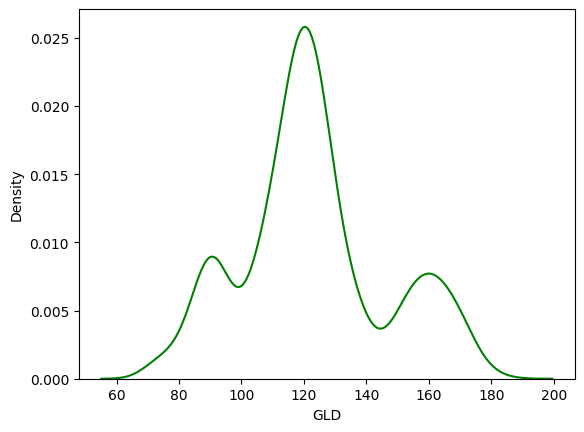

In [18]:
sns.kdeplot(gold_df['GLD'],color = 'green')

# Splitting the features and target

In [19]:
X = gold_df.drop(columns = ['Date','GLD'])
print(X)

         SPX   USO   SLV  EUR/USD
0    1447.16 78.47 15.18     1.47
1    1447.16 78.37 15.29     1.47
2    1411.63 77.31 15.17     1.48
3    1416.18 75.50 15.05     1.47
4    1390.19 76.06 15.59     1.56
...      ...   ...   ...      ...
2285 2671.92 14.06 15.51     1.19
2286 2697.79 14.37 15.53     1.18
2287 2723.07 14.41 15.74     1.19
2288 2730.13 14.38 15.56     1.19
2289 2725.78 14.41 15.45     1.18

[2290 rows x 4 columns]


In [20]:
Y = gold_df['GLD']
print(Y)

0       84.86
1       85.57
2       85.13
3       84.77
4       86.78
        ...  
2285   124.59
2286   124.33
2287   125.18
2288   124.49
2289   122.54
Name: GLD, Length: 2290, dtype: float64


### Splitting into training data and test data

In [21]:
#Using sklearn train test split module
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state = 2)

In [22]:
#find the shape the train and test data for X
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(2290, 4)
(1832, 4)
(458, 4)


In [23]:
#find the shape the train and test data for Y
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(2290,)
(1832,)
(458,)


# MODEL TRAINING :Random forest regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
#create the object for random forest regressor
regressor = RandomForestRegressor(n_estimators = 100)

In [26]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## Model evaluation

In [27]:
#Prediction on the test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.57849948  82.29749972 116.04480027 127.72500042 120.67900129
 154.77959745 150.40859831 126.05650023 117.44869857 125.98150092
 117.08410072 172.4128009  141.25679831 167.75449841 115.04950015
 117.48890047 138.57430235 170.24680078 159.10330245 158.37599936
 155.24620033 125.35950012 176.40539954 157.22710361 125.27450043
  93.99289961  77.55869994 120.5852996  119.07389936 167.51740049
  88.15560051 125.34039993  91.17060075 117.66930001 121.12979934
 136.53160055 115.40910127 114.9576009  147.56419951 106.98170116
 104.6263024   87.16399791 126.52320035 118.14009996 154.94019933
 119.67710026 108.46949949 107.92519827  93.1835003  127.08309785
  74.90450026 113.67559952 121.21590008 111.16219926 118.7505988
 120.60169913 159.7354003  168.83140108 146.88059735  85.89289852
  94.48340027  86.78259842  90.62940023 119.04020074 126.49610065
 127.61640018 169.50129942 122.20499938 117.23329879  98.45790038
 168.44200034 142.82039742 131.92360259 121.2503021  121.21119948
 119.729500

In [28]:
Y_test

903    168.02
129     81.23
1787   112.32
1913   127.59
2048   119.62
        ...  
923    166.38
1693   106.38
2054   122.24
658    133.83
376    102.36
Name: GLD, Length: 458, dtype: float64

In [29]:
# R square error
r_score = metrics.r2_score(Y_test,test_data_prediction)
print('R square error :', r_score)

R square error : 0.9889619755231116


### compare the actual values and predicted values in plot

In [30]:
y_test = list(Y_test)
print(y_test)

[168.020004, 81.230003, 112.32, 127.589996, 119.620003, 154.210007, 148.910004, 126.190002, 117.470001, 125.739998, 115.379997, 167.119995, 141.630005, 169.559998, 115.599998, 119.669998, 132.949997, 170.399994, 159.369995, 173.529999, 154.720001, 128.119995, 177.720001, 157.190002, 125.309998, 93.400002, 76.790001, 119.690002, 118.989998, 167.389999, 87.5, 124.980003, 91.230003, 115.489998, 120.949997, 133.809998, 116.690002, 113.809998, 133.580002, 105.970001, 105.120003, 87.959999, 126.82, 116.860001, 159.259995, 119.459999, 109.160004, 108.620003, 93.269997, 127.160004, 72.260002, 113.470001, 119.68, 109.139999, 119.309998, 120.050003, 159.889999, 161.490005, 146.740005, 85.809998, 93.709999, 85.550003, 91.029999, 118.489998, 126.449997, 126.980003, 171.699997, 122.400002, 116.410004, 97.959999, 169.630005, 142.639999, 131.809998, 121.360001, 124.0, 119.699997, 113.889999, 118.919998, 105.639999, 127.669998, 114.32, 107.309998, 114.82, 119.230003, 86.860001, 87.010002, 147.729996, 

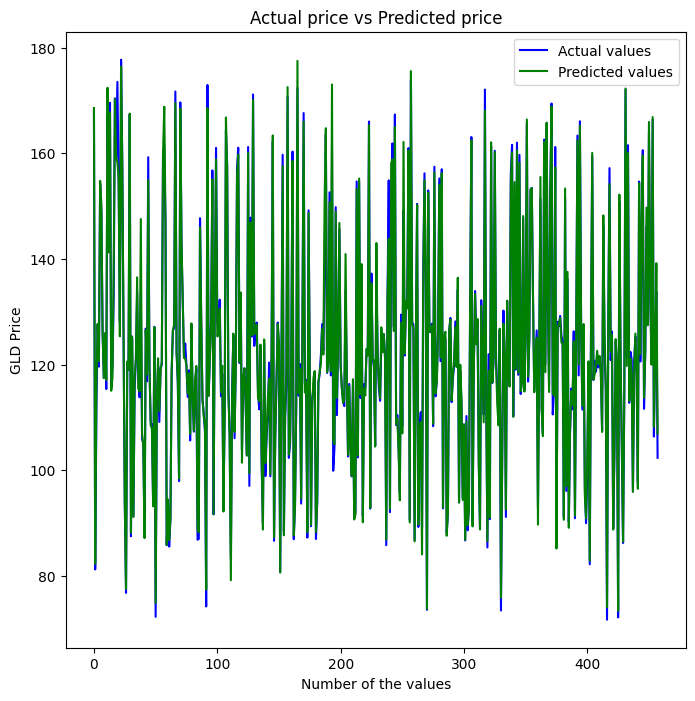

In [31]:
plt.figure(figsize = (8,8))
plt.plot(y_test,color = 'blue',label = 'Actual values')
plt.plot(test_data_prediction,color = 'green',label = 'Predicted values')
plt.title("Actual price vs Predicted price")
plt.xlabel("Number of the values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

## Saving the model

In [32]:
import pickle

with open("F:\\Machine learning prediction\\gold_price_predict.pkl","wb") as f:
    pickle.dump(regressor,f)

In [1]:
# load the model pickel 
import pickle

with open("F:\\Machine learning prediction\\gold_price_predict.pkl","rb") as f:
    model = pickle.load(f)

In [2]:
model.predict([[1447.16,78.47,15.18,1.47]])

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([84.75870024])

In [38]:
import joblib

joblib.dump(regressor,"F:\\Machine learning prediction\\goldprice_joblib.pkl")

['F:\\Machine learning prediction\\goldprice_joblib.pkl']

In [4]:
import joblib
model = joblib.load("F:\\Machine learning prediction\\goldprice_joblib.pkl")
model.predict([[1447.16,78.47,15.18,1.47]])

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([84.75870024])

In [41]:
X

,SPX,USO,SLV,EUR/USD
0,1447.16,78.47,15.18,1.47
1,1447.16,78.37,15.29,1.47
2,1411.63,77.31,15.17,1.48
3,1416.18,75.50,15.05,1.47
4,1390.19,76.06,15.59,1.56
...,...,...,...,...
2285,2671.92,14.06,15.51,1.19
2286,2697.79,14.37,15.53,1.18
2287,2723.07,14.41,15.74,1.19
2288,2730.13,14.38,15.56,1.19
